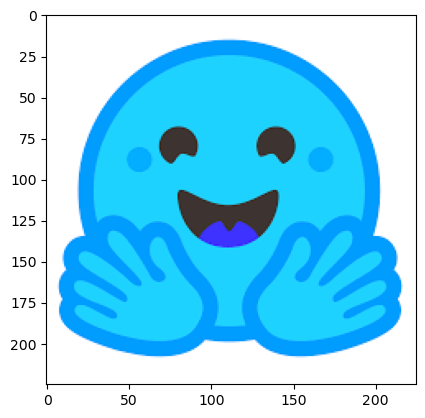

In [2]:
import cv2  
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("C:/Users/Asus/Downloads/hf logo.png")  

plt.imshow(image)

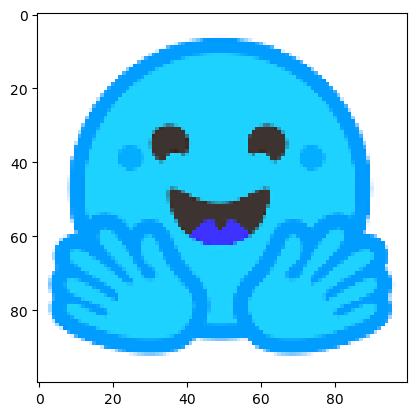

In [4]:
# Resize the image to 224x224 pixels
resized_image = cv2.resize(image, (100, 100))  
plt.imshow(resized_image)


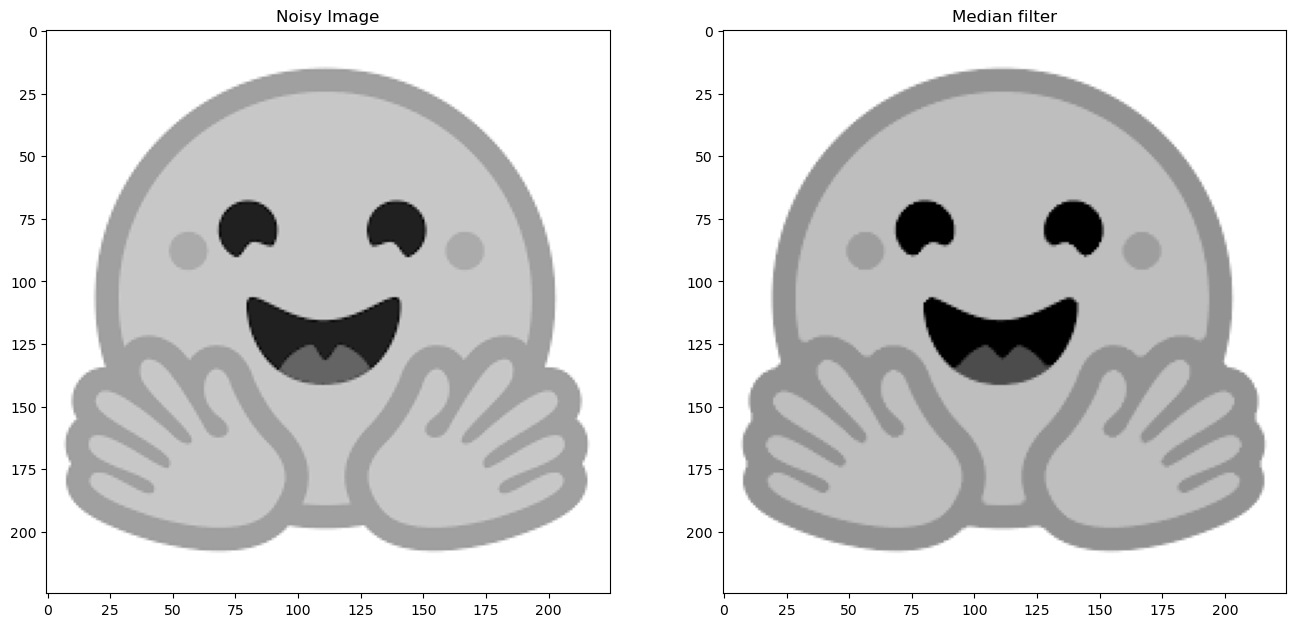

In [5]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(img,5)
plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')
plt.subplot(122),
plt.imshow(median,cmap = 'gray')
plt.title('Median filter')
plt.show()

Text(0.5, 1.0, 'smoothing with Gaussian sigma=7')

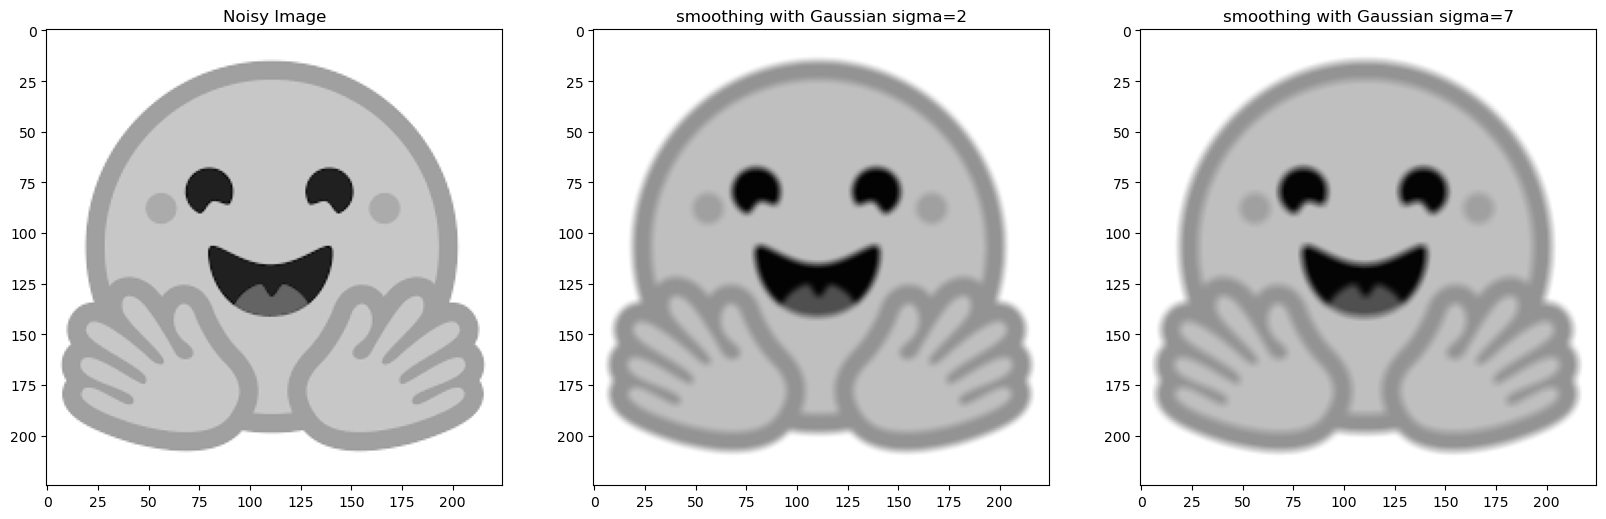

In [6]:
gaussian_blur1 = cv2.GaussianBlur(img,(5,5),2,cv2.BORDER_DEFAULT)
gaussian_blur2 = cv2.GaussianBlur(img,(5,5),7,cv2.BORDER_DEFAULT)

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')

plt.subplot(1,3,2),
plt.imshow(gaussian_blur1,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=2')

plt.subplot(1,3,3),
plt.imshow(gaussian_blur2,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=7')

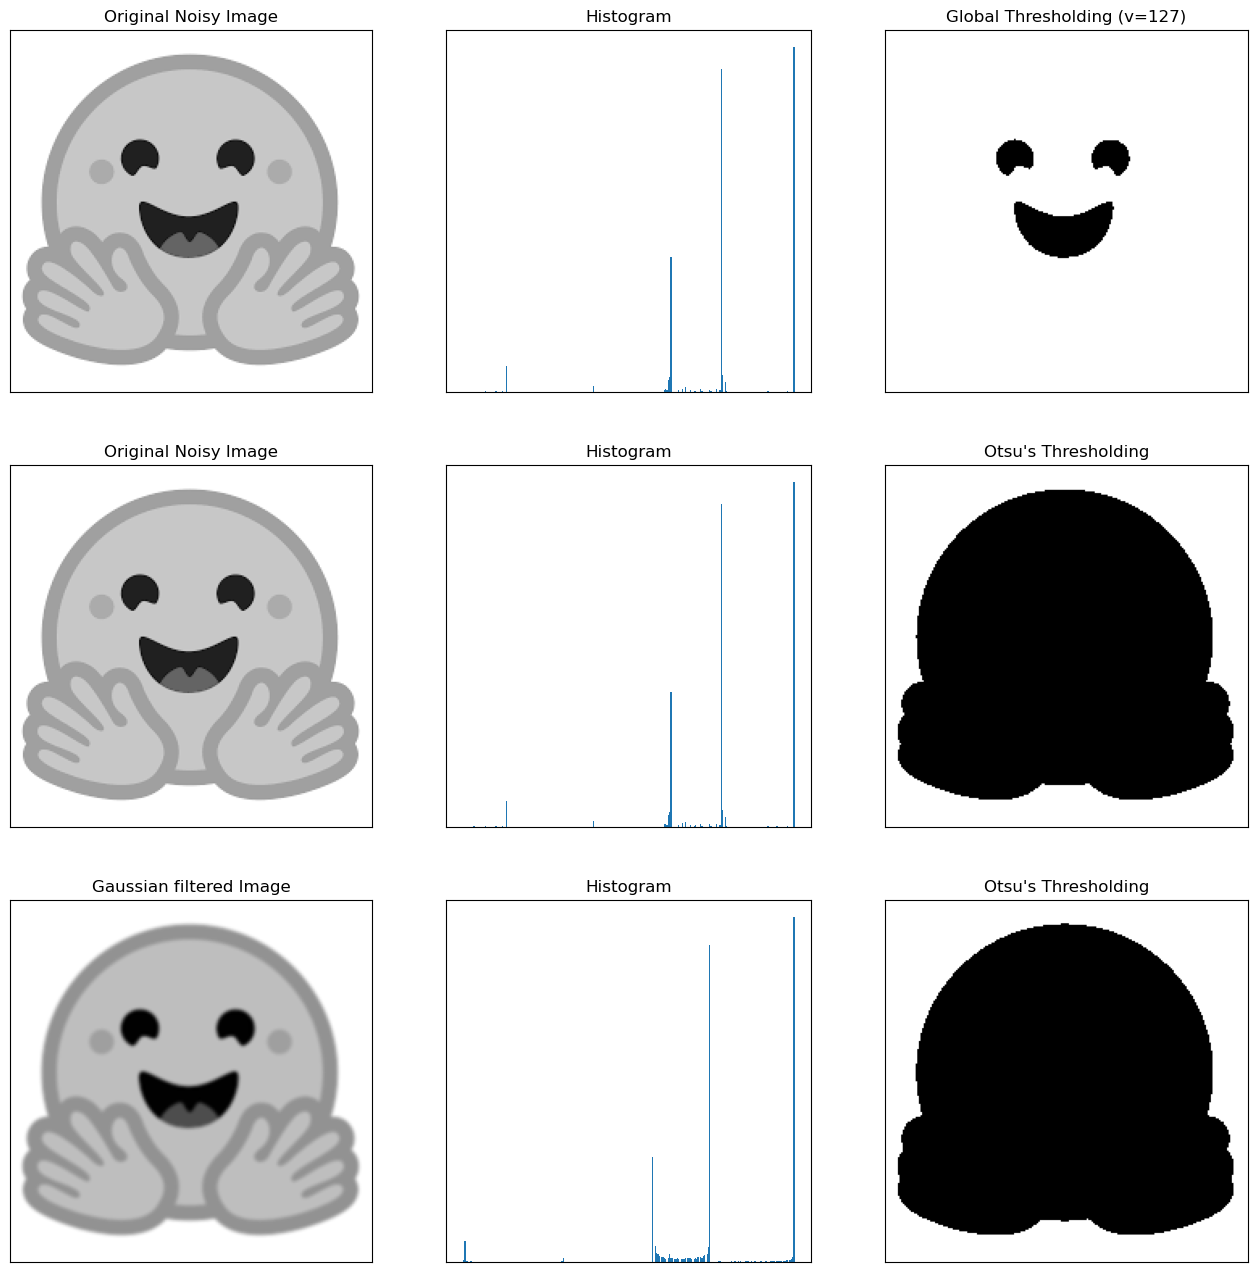

In [7]:
plt.figure(figsize=(16,16))
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()